In [42]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [52]:
filename = '../Images/2024-08-08/16-00-58_Cam4_focused5'

def read_settings(csv_path, columns):
    df = pd.read_csv(csv_path)
    values = [df[col][0] for col in columns]
    return values


# Read data associated with image
csv_path = filename + '.csv'
df = pd.read_csv(csv_path)
xc, yc, h, w, calibration = read_settings(csv_path, ['xc', 'yc', 'roi_h', 'roi_w', 'calibration'])
h, w = 50, 50

Text(0.5, 1.0, 'Focused Beam at IP')

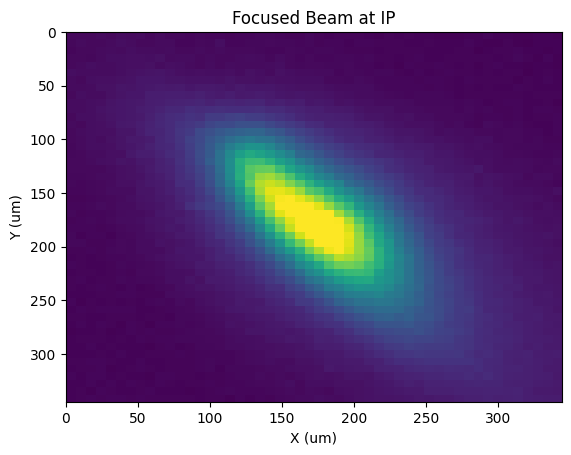

In [53]:

# Read image, apply roi
image_path = filename + '.png'
image = np.array(Image.open(image_path))
roi_image = image[int(yc-h/2):int(yc+h/2), int(xc-w/2):int(xc+w/2)]

# Plot
fig, ax = plt.subplots()
ax.imshow(roi_image, extent=[0, (w-1)*calibration, (h-1)*calibration, 0], aspect='auto')
ax.set_xlabel('X (um)')
ax.set_ylabel('Y (um)')
ax.set_title('Focused Beam at IP')
